Download Requiered Modules

In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [49]:
# Step 1: Load the data
ftse_100 = pd.read_csv('FTSE_100.csv')
macro_data = pd.read_csv('Macro_Data.csv')

In [50]:
ftse_100 = ftse_100.apply(lambda x: x.str.replace(',', '', regex=False))

In [51]:
print(ftse_100['Date'].dtypes)
print(macro_data['Date'].dtypes)

object
object


In [52]:
ftse_100['Date'] = pd.to_datetime(ftse_100['Date'], format='%d/%m/%Y')
macro_data['Date'] = pd.to_datetime(macro_data['Date'], format='%d/%m/%Y')

In [53]:
ftse_100.set_index('Date', inplace=True)
macro_data.set_index('Date', inplace=True)

In [54]:
combined_data = pd.concat([ftse_100, macro_data], axis=1)

In [55]:
combined_data.tail()

,Price,Open,High,Low,GDP,Bank Rate,CPI,OECD CCI,Unemployment Rate
Date,,,,,,,,,
2022-09-01,6893.81,7284.15,7514.04,6829.29,101.9,1.75,10.1,92.64270,3.6
2022-10-01,7094.53,6893.81,7132.85,6707.62,102.0,2.25,9.9,92.21188,3.5
2022-11-01,7573.05,7094.53,7599.27,7076.47,101.5,2.25,10.1,92.31421,3.6
2022-12-01,7451.74,7573.05,7599.70,7302.82,102.3,3.00,11.1,92.73776,3.7
2023-01-01,7771.70,7451.74,7875.58,7448.69,102.3,3.50,10.7,93.14130,3.7


In [57]:
# Step 4: Save the merged DataFrame
combined_data.to_csv('Combined_FTSE_Macro.csv', index=True)

Mixed DataFrame Made & Ready to Use

In [58]:
columns_to_convert = combined_data.select_dtypes(include=['int', 'object']).columns.tolist()

In [59]:
combined_data[columns_to_convert] = combined_data[columns_to_convert].astype(float)

Heatmap

In [60]:
correlation_matrix = combined_data.corr()

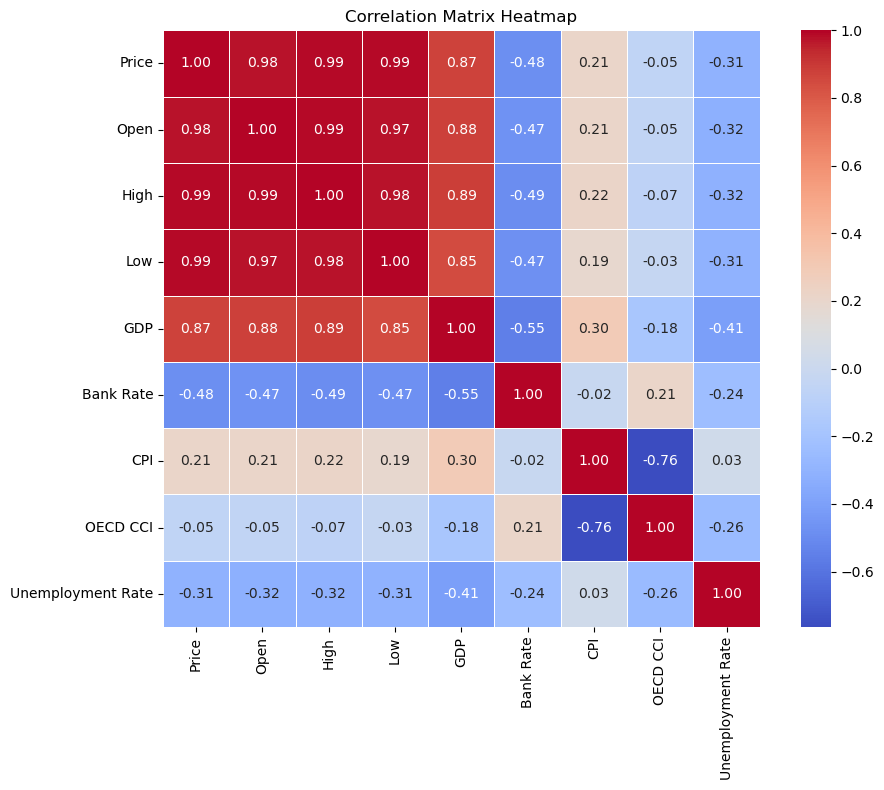

In [62]:
plt.figure(figsize=(10, 8))  # You can adjust the size of the figure here
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            cbar=True, square=True, linewidths=.5)

# Add title and possibly adjust layout
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()  # Adjusts plot to ensure everything fits without overlap

# Show the plot
plt.show()

Time Series Plots For All Variables

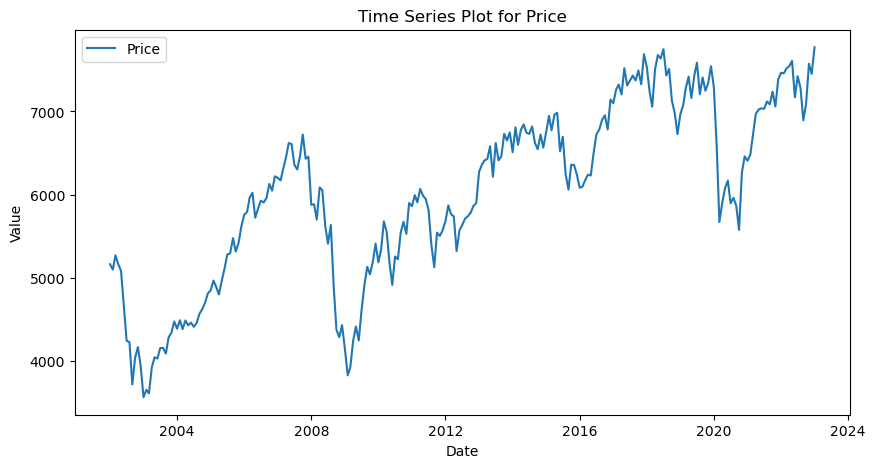

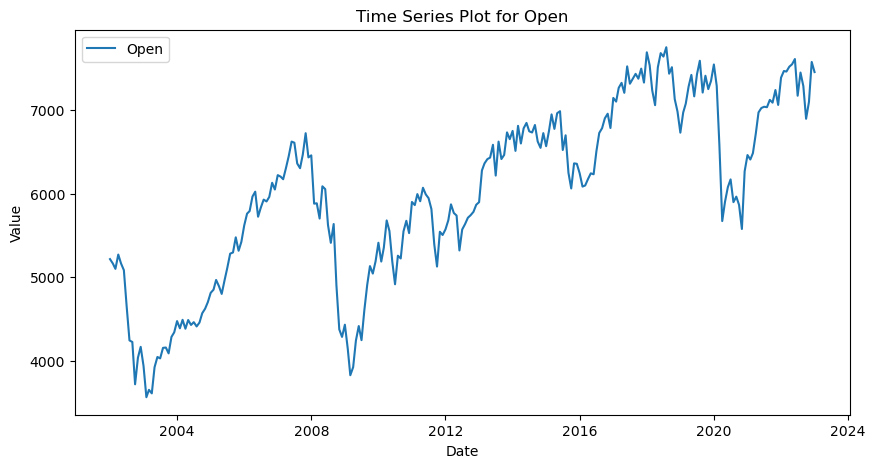

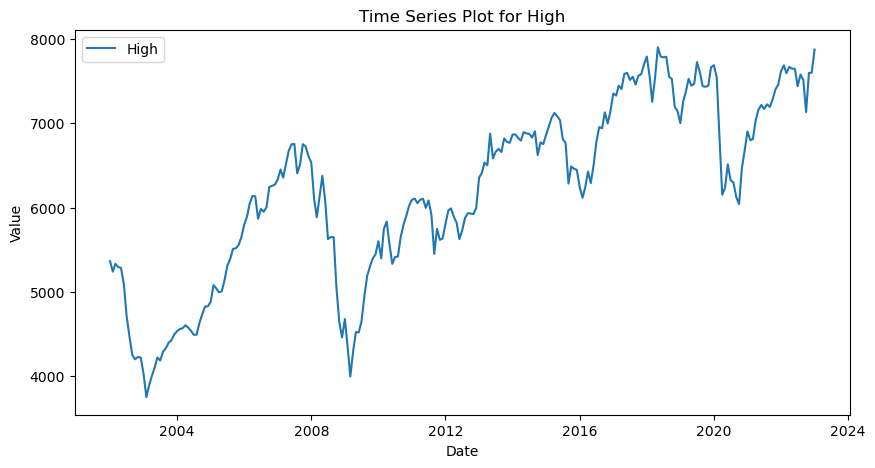

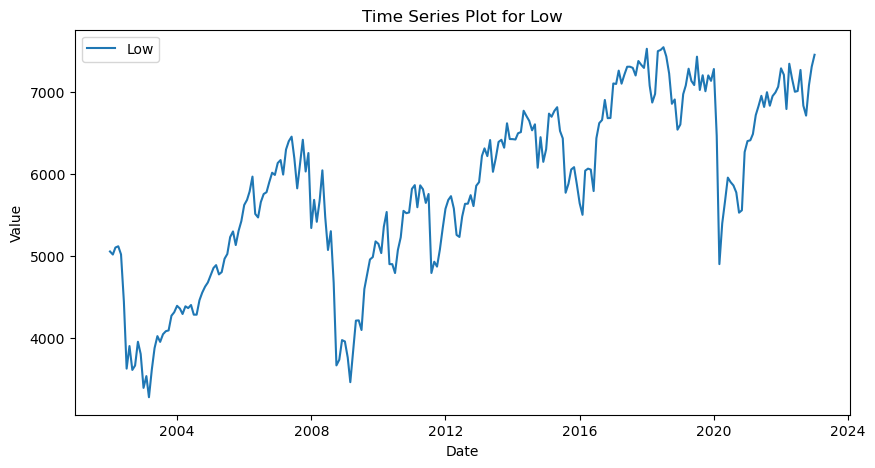

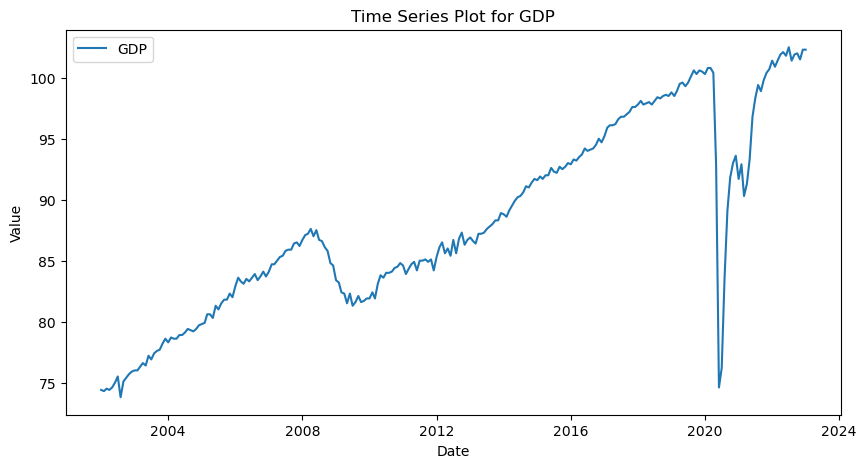

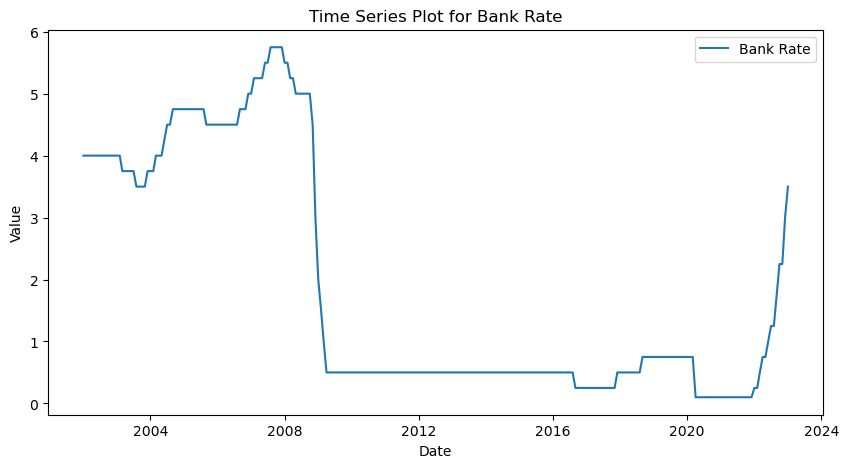

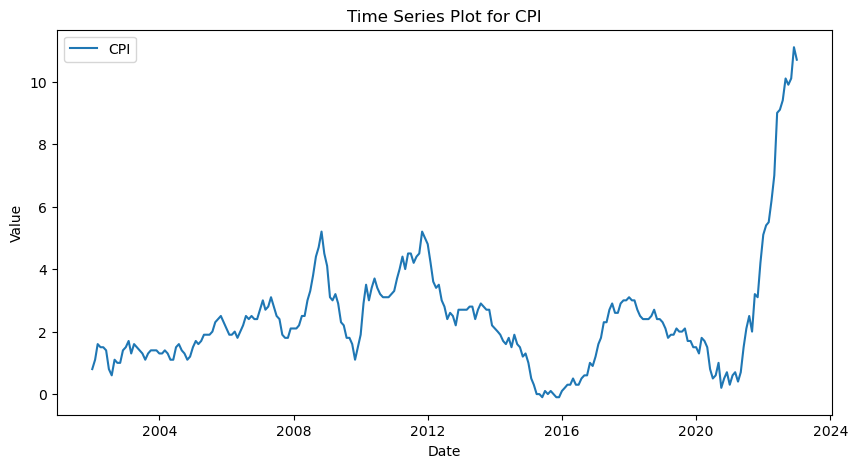

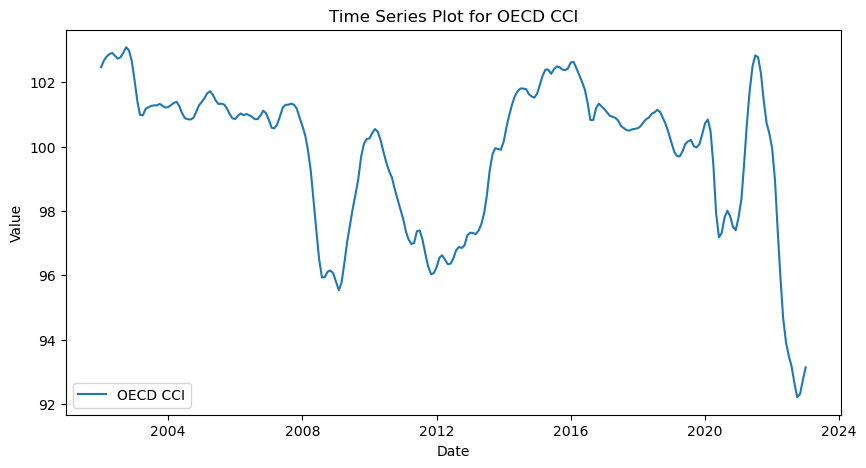

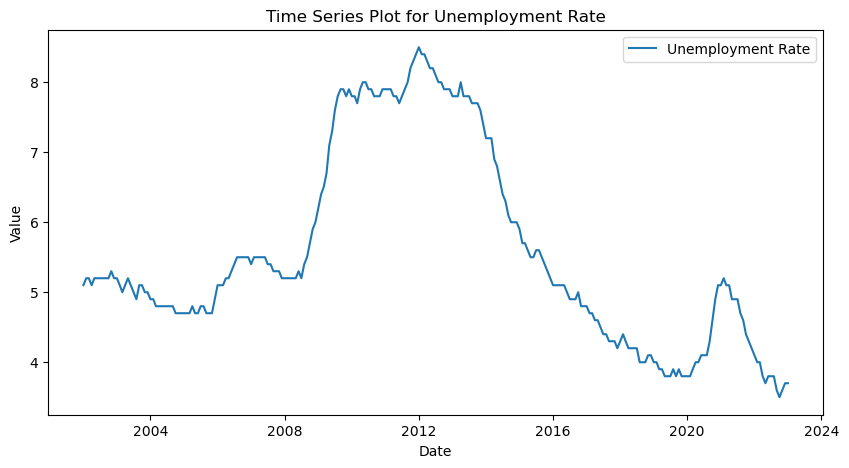

In [63]:
for column in combined_data.columns:
    plt.figure(figsize=(10, 5))  # Set the figure size as desired
    plt.plot(combined_data.index, combined_data[column], label=column)
    plt.title(f'Time Series Plot for {column}')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

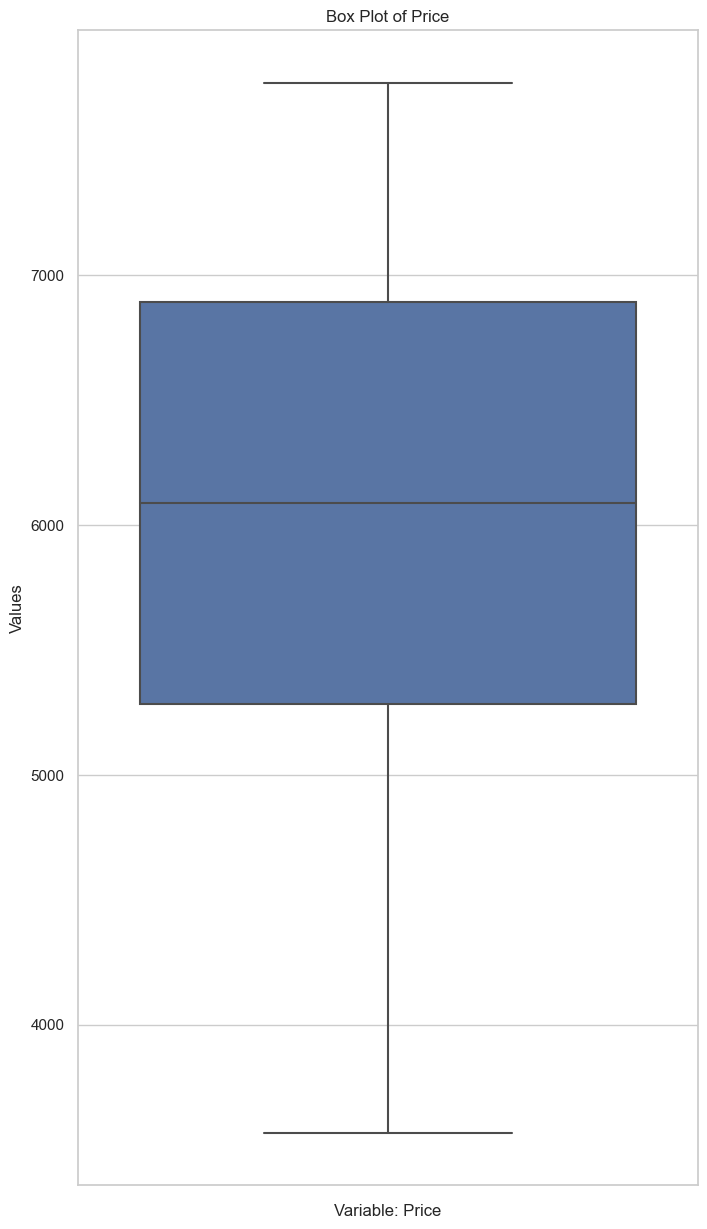

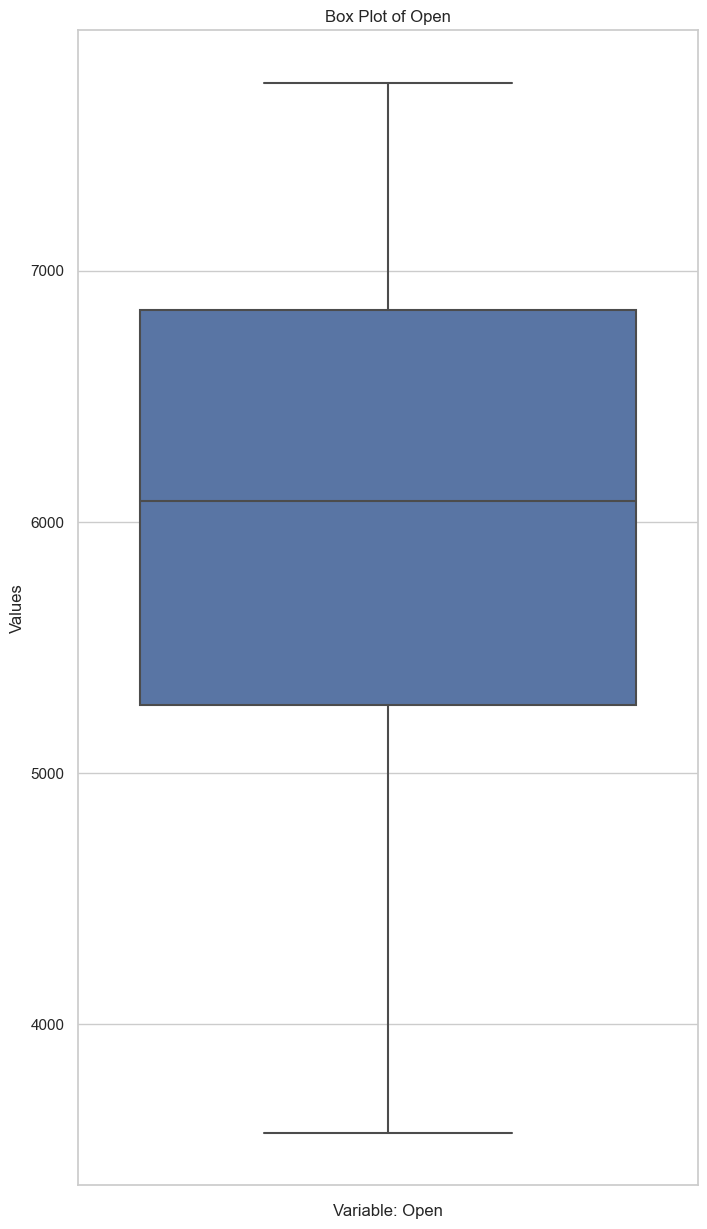

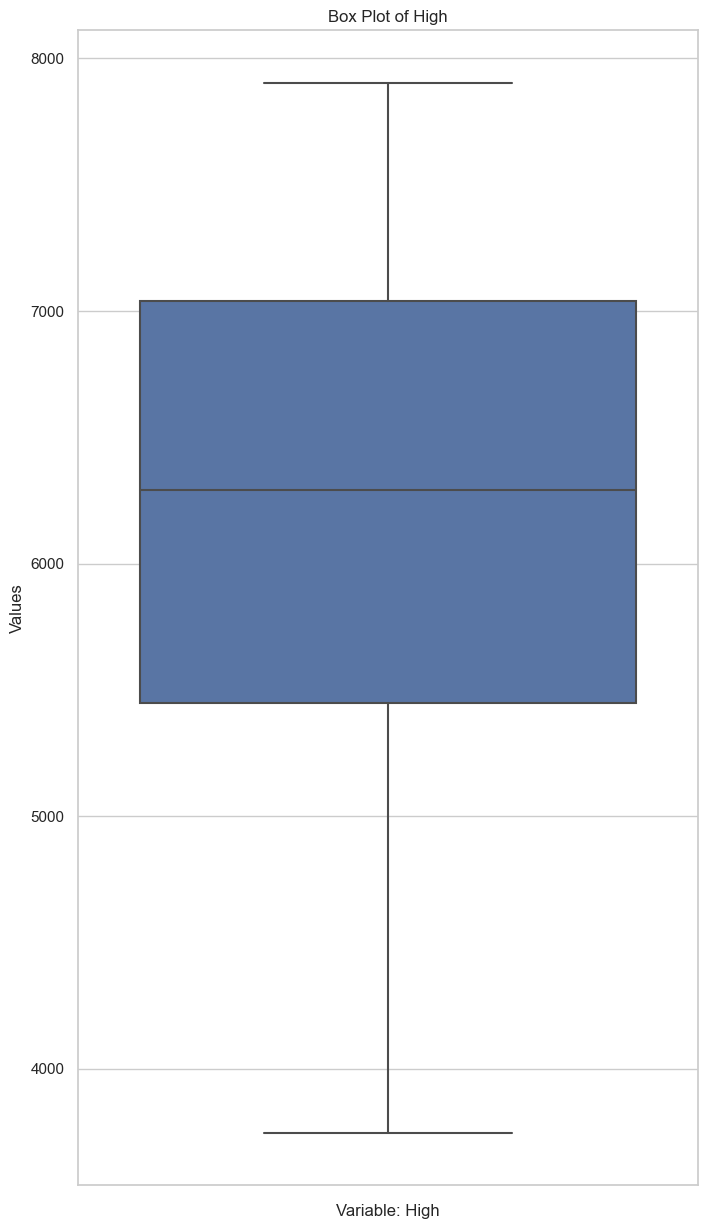

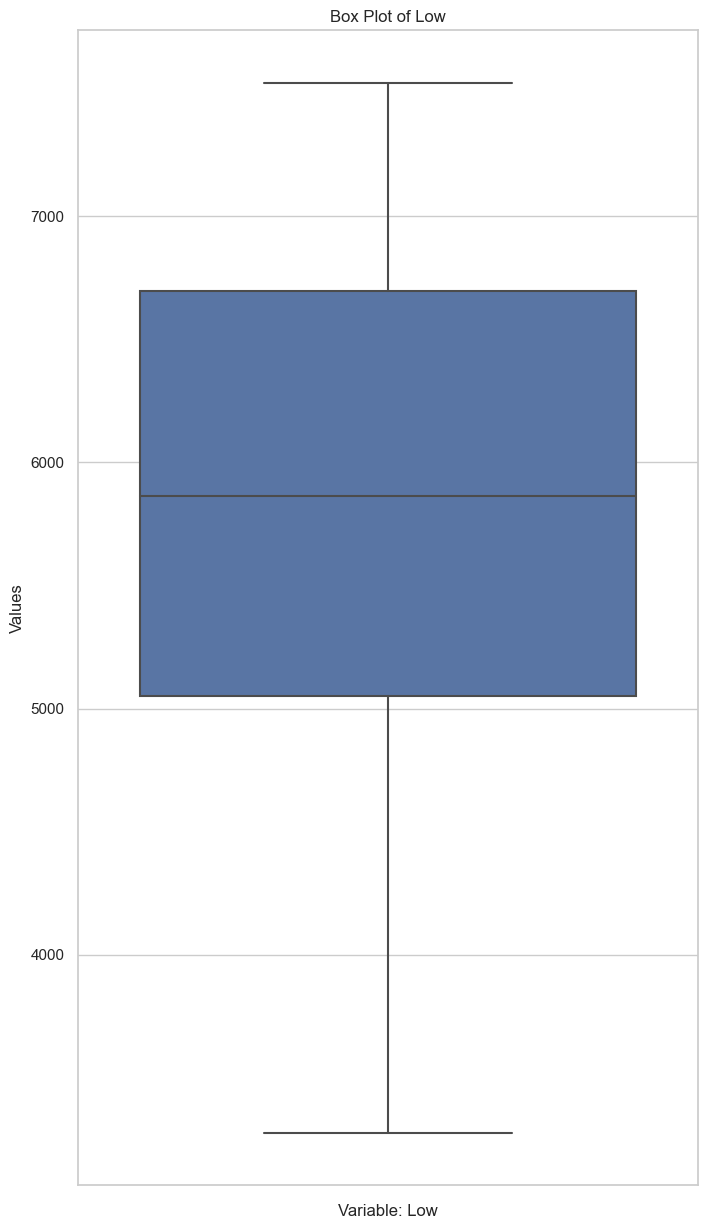

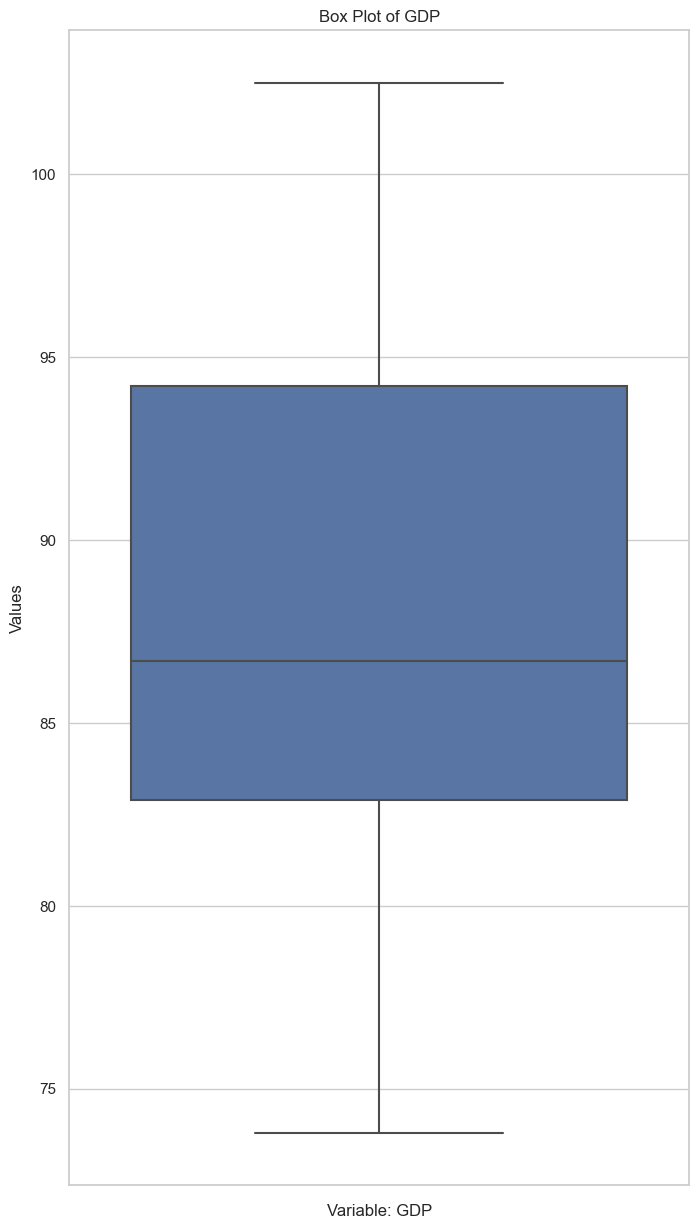

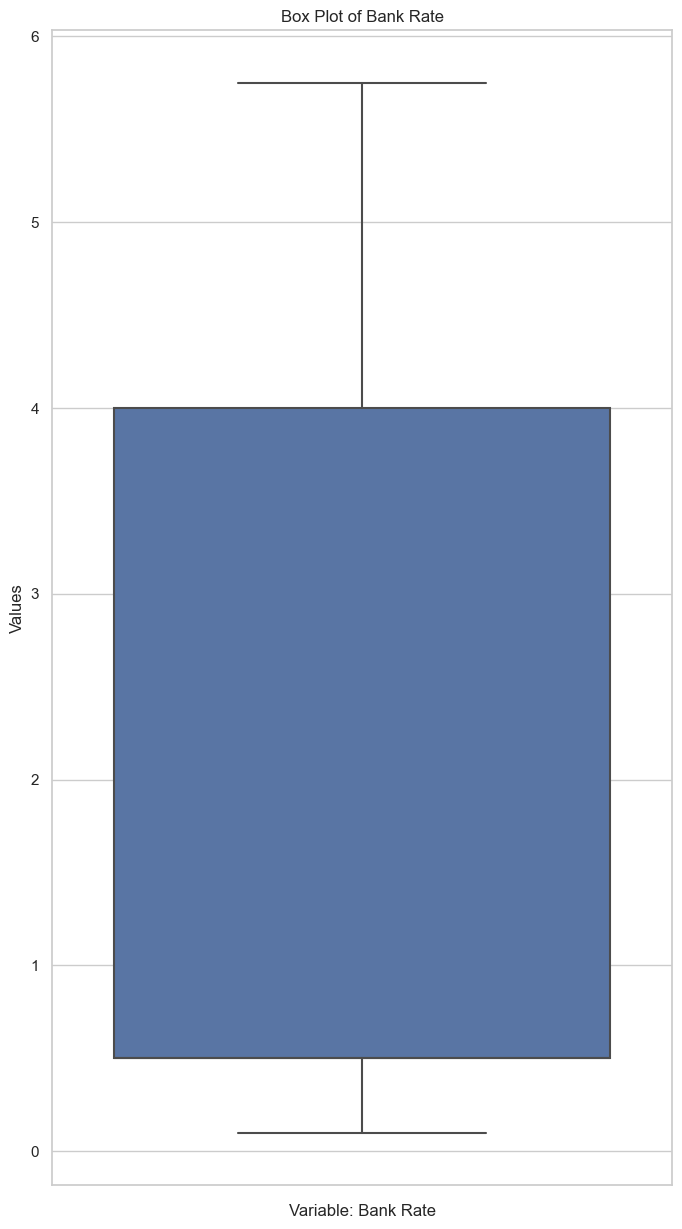

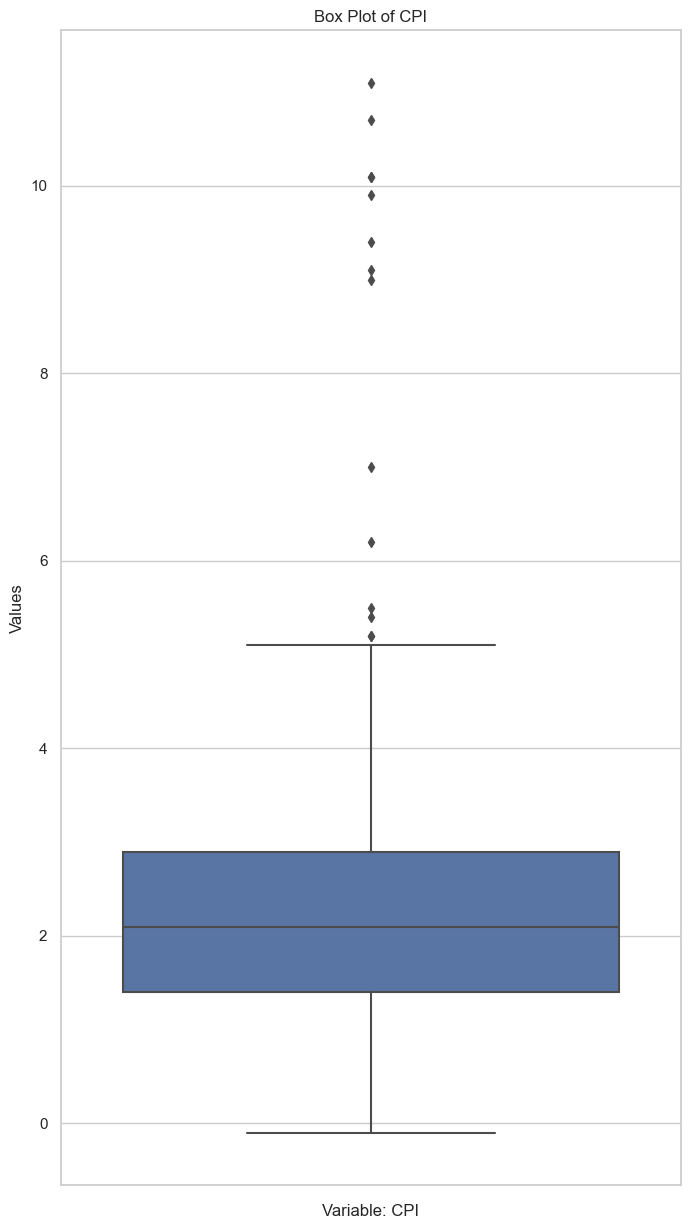

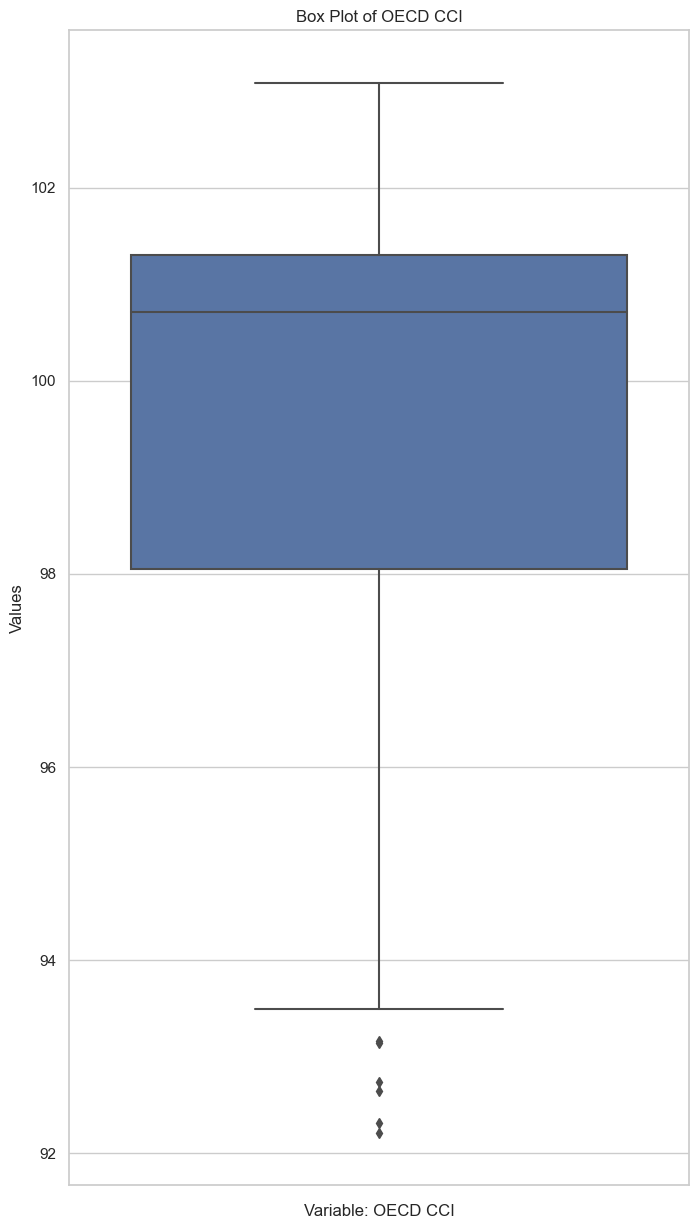

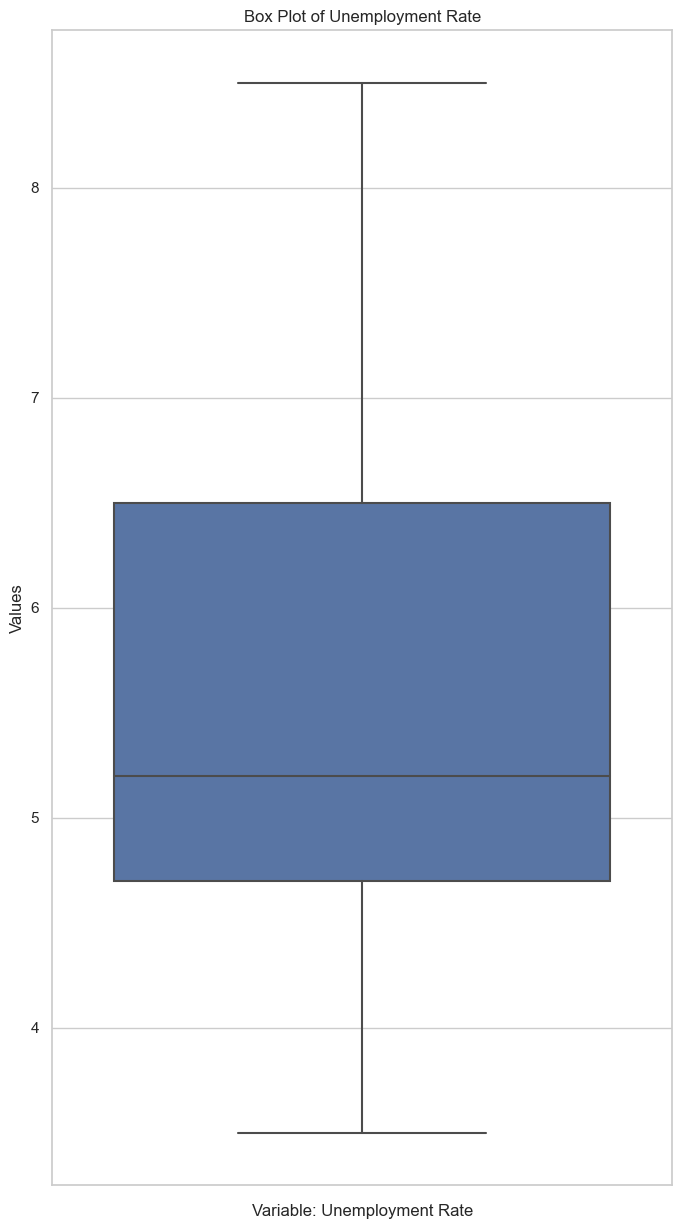

In [66]:
# Setting the style for better aesthetics
sns.set(style="whitegrid")

# Plotting box plots for each column in the DataFrame
for column in combined_data.columns:
    plt.figure(figsize=(8, 15))  # Set the figure size as needed
    sns.boxplot(y=combined_data[column])
    plt.title(f'Box Plot of {column}')
    plt.ylabel('Values')
    plt.xlabel('Variable: ' + column)
    plt.show()

<Figure size 1000x500 with 0 Axes>

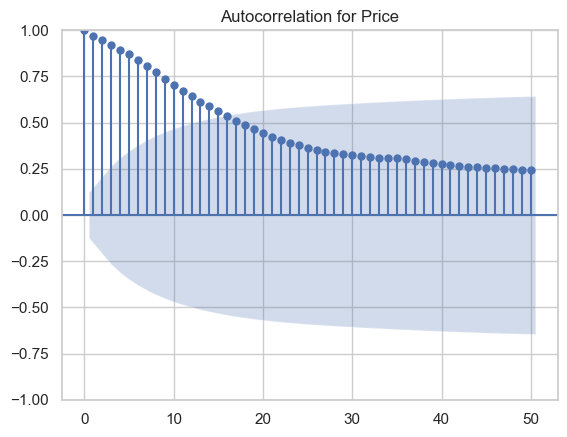

<Figure size 1000x500 with 0 Axes>

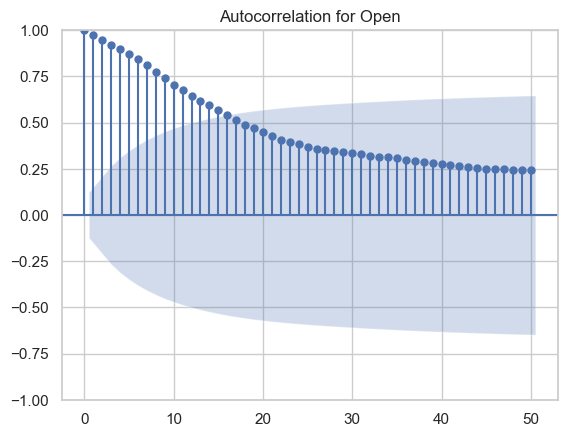

<Figure size 1000x500 with 0 Axes>

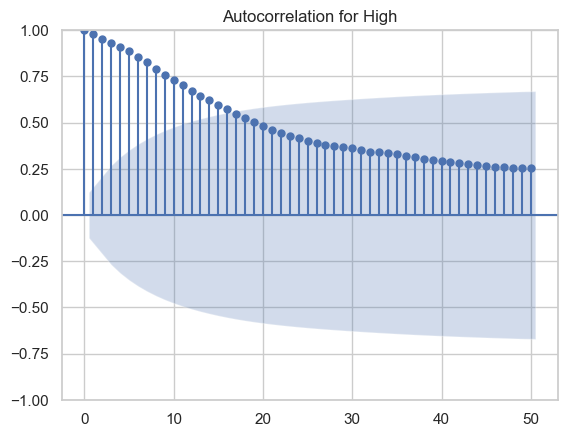

<Figure size 1000x500 with 0 Axes>

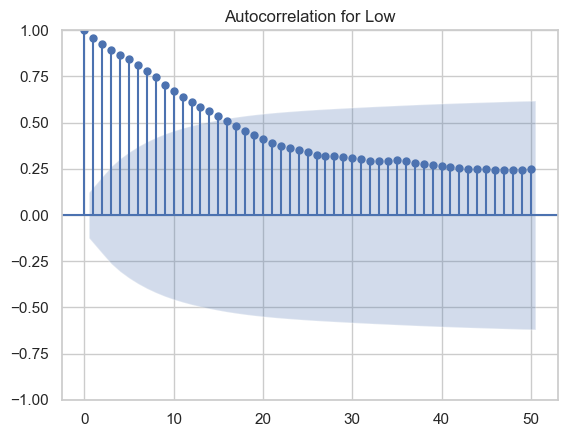

<Figure size 1000x500 with 0 Axes>

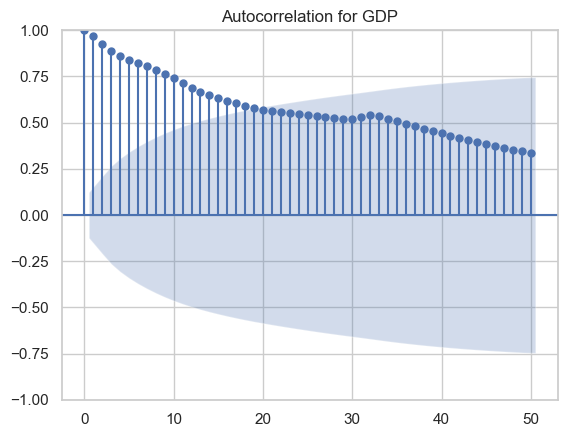

<Figure size 1000x500 with 0 Axes>

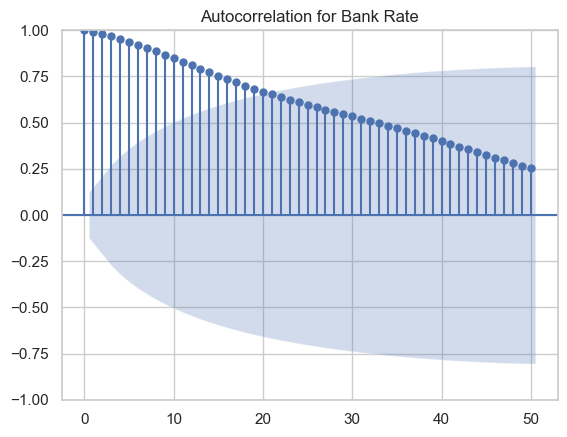

<Figure size 1000x500 with 0 Axes>

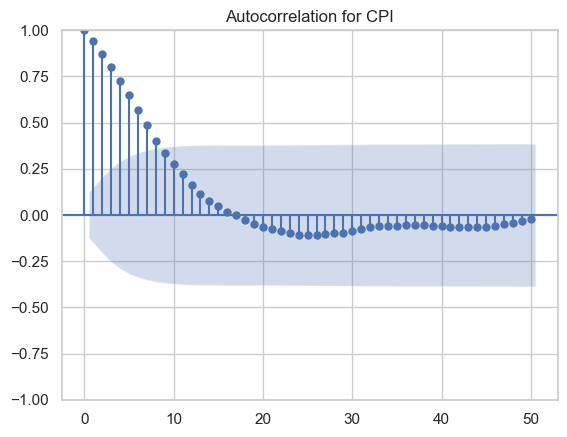

<Figure size 1000x500 with 0 Axes>

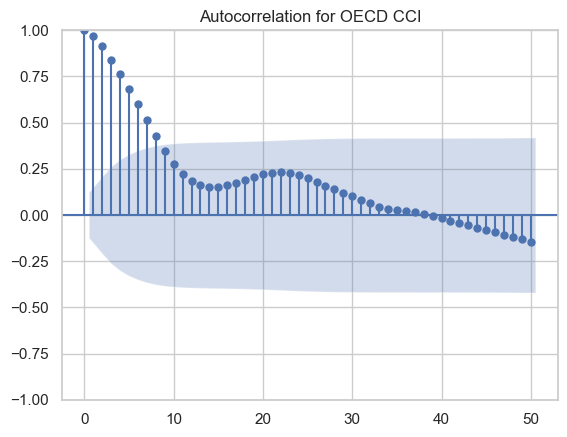

<Figure size 1000x500 with 0 Axes>

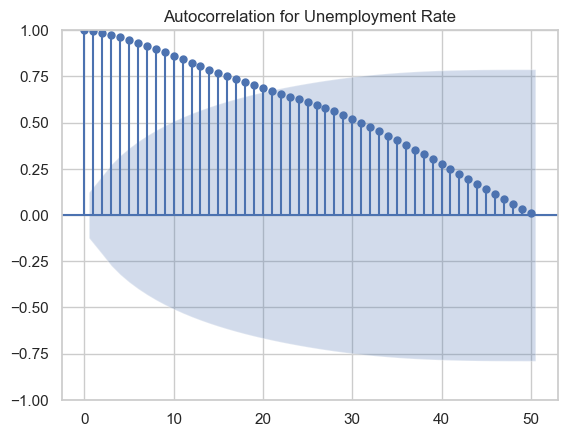

In [76]:
for column in combined_data.columns:
    plt.figure(figsize=(10, 5))  # Adjust the figure size as needed
    plot_acf(combined_data[column], lags=50, title=f'Autocorrelation for {column}')  # Adjust the number of lags as necessary
    plt.show()

<Figure size 1000x500 with 0 Axes>

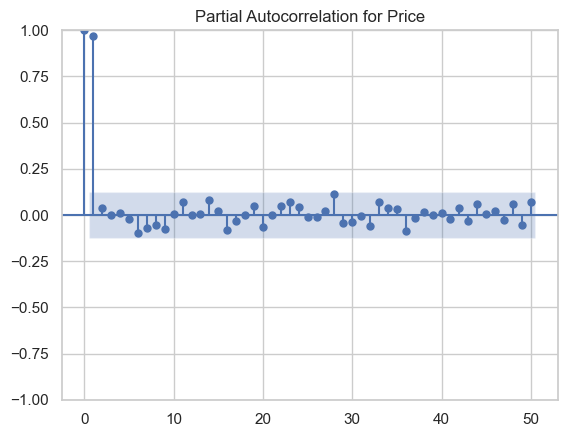

<Figure size 1000x500 with 0 Axes>

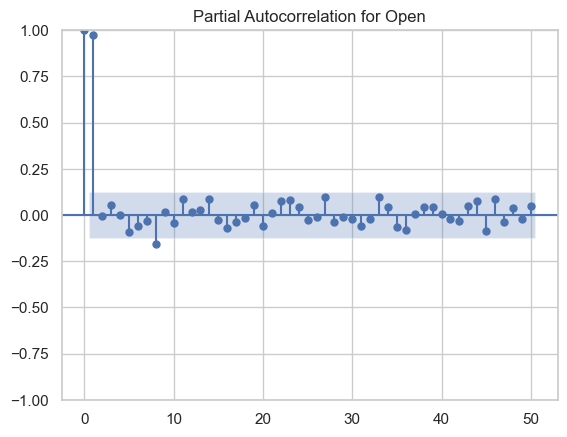

<Figure size 1000x500 with 0 Axes>

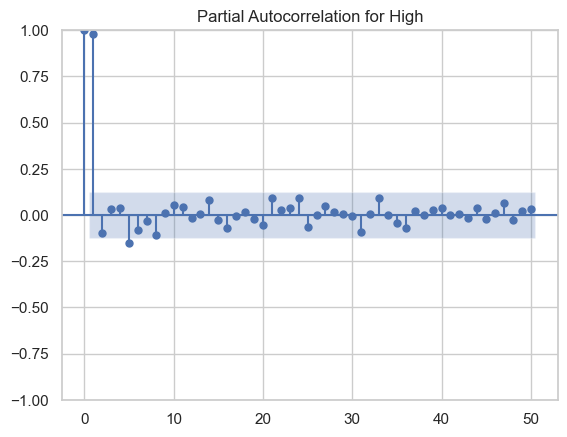

<Figure size 1000x500 with 0 Axes>

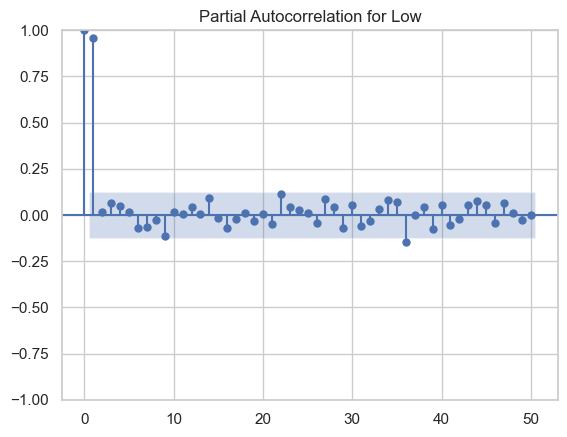

<Figure size 1000x500 with 0 Axes>

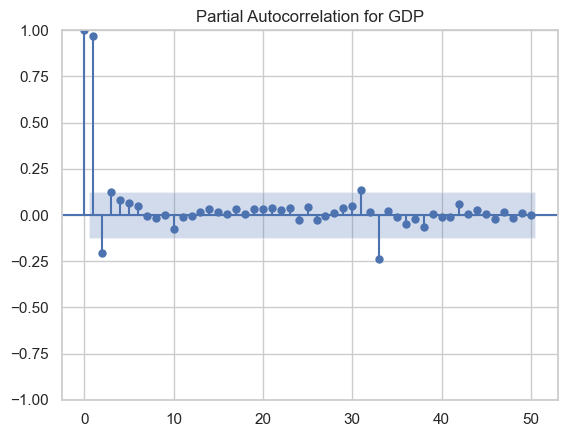

<Figure size 1000x500 with 0 Axes>

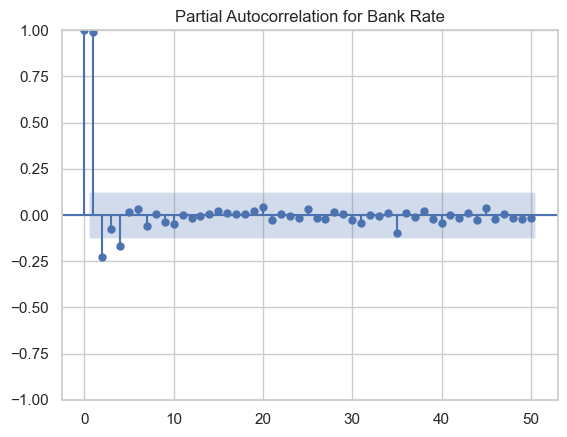

<Figure size 1000x500 with 0 Axes>

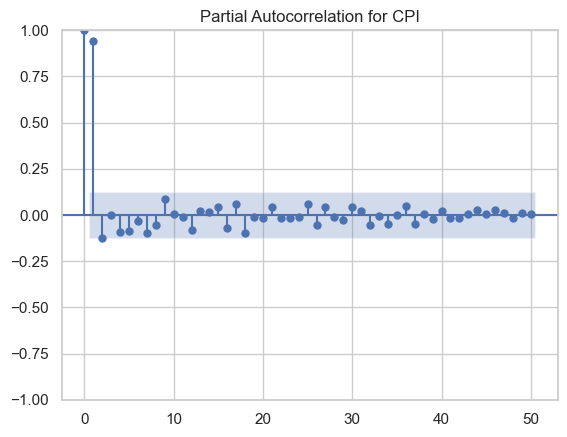

<Figure size 1000x500 with 0 Axes>

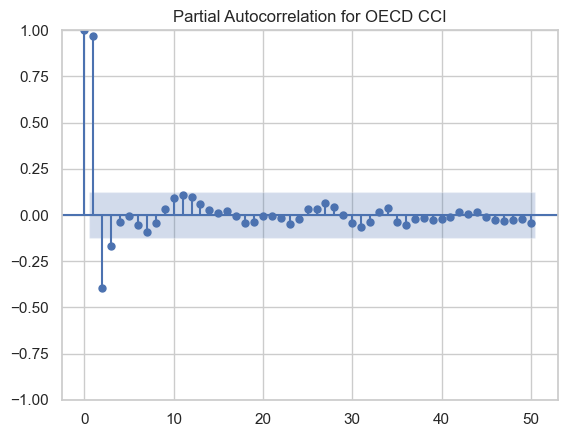

<Figure size 1000x500 with 0 Axes>

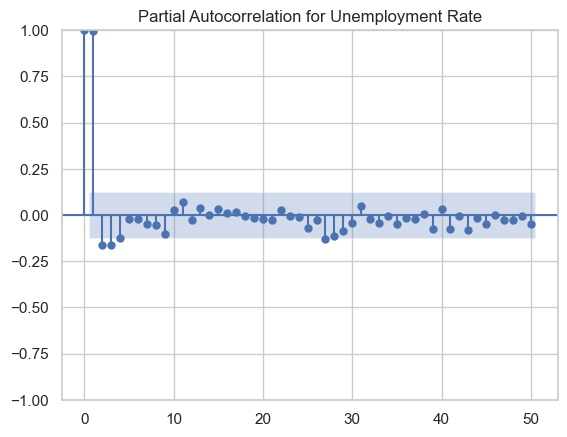

In [75]:
for column in combined_data.columns:
    plt.figure(figsize=(10, 5))  # Adjust the figure size as needed
    plot_pacf(combined_data[column], lags=50, title=f'Partial Autocorrelation for {column}', method='ywm')  # Adjust the number of lags as necessary
    plt.show()